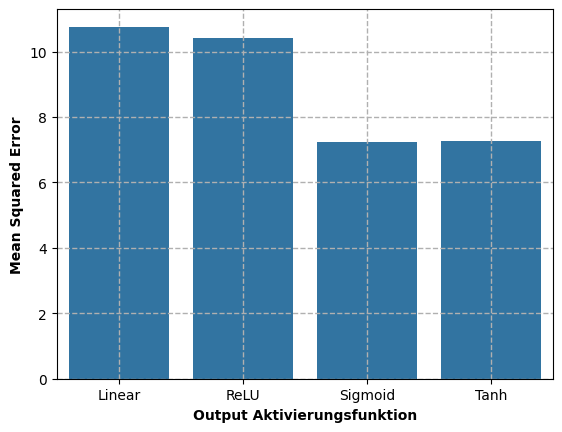

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

#sns.set_theme(rc={'figure.figsize':(15/2.54,8/2.54)})

# Load the data
df = pd.read_csv('activation.csv')

df['output_activation'] = df['output_activation'].replace('linear', 'Linear')
df['output_activation'] = df['output_activation'].replace('sigmoid', 'Sigmoid')
df['output_activation'] = df['output_activation'].replace('tanh', 'Tanh')
df['output_activation'] = df['output_activation'].replace('softmax', 'Softmax')
df['output_activation'] = df['output_activation'].replace('<keras.src.layers.activation.relu.ReLU object at 0x7cc0706d24d0>', 'ReLU')

filtered = df
filtered = df.query("output_activation != 'Softmax'")

metrics = ['mean_squared_error', 'mean_absolute_error']
#print(filtered)

g = sns.barplot(data=filtered, x='output_activation', y='root_mean_squared_error')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.xlabel('Output Aktivierungsfunktion', fontweight='bold')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('activation_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()

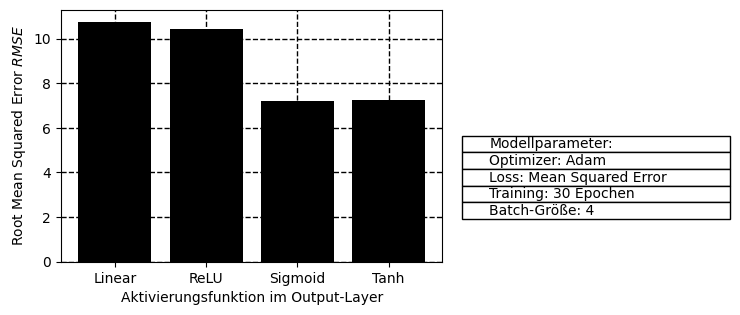

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

### Data
df = pd.read_csv('activation.csv')

df['output_activation'] = df['output_activation'].replace('linear', 'Linear')
df['output_activation'] = df['output_activation'].replace('sigmoid', 'Sigmoid')
df['output_activation'] = df['output_activation'].replace('tanh', 'Tanh')
df['output_activation'] = df['output_activation'].replace('softmax', 'Softmax')
df['output_activation'] = df['output_activation'].replace('<keras.src.layers.activation.relu.ReLU object at 0x7cc0706d24d0>', 'ReLU')

filtered = df
filtered = df.query("output_activation != 'Softmax'")


### Plot

fig = plt.figure(figsize=(17/2.54, 8/2.54))

ax = fig.add_axes([0, 0.1, 0.57, 0.8])

plt.bar(filtered['output_activation'], filtered['root_mean_squared_error'], color='k')

plt.ylabel('Root Mean Squared Error $RMSE$')
plt.xlabel('Aktivierungsfunktion im Output-Layer')
plt.grid(True, linestyle='--',color='k', linewidth=1, zorder=0)


### Legend and Text
ax_legend = fig.add_axes([0.65, 0.5, 0.2, 0.4])  # [left, bottom, width, height]
ax_text = fig.add_axes([0.6, 0.5, 0.4, 0.4])  # [left, bottom, width, height]

#ax_legend.legend()
ax_legend.axis('off')  # Hide the axis for the legend area

text = "Modellparameter:\nOptimizer: Adam\n Loss: Mean Squared Error\nTraining: 30 Epochen\nBatch-Größe: 4"
lines = text.split('\n')

#ax_text.text(0, 0, 'Modellparameter:', fontweight='bold', horizontalalignment='left')

#for i, line in enumerate(lines):
#    if i == 0: fontweight='bold'
#    else: fontweight='normal'
#    ax_text.text(0, 0 - i * 0.17, line, horizontalalignment='left', verticalalignment='top', fontweight=fontweight)
text = [['Optimizer: Adam'], ['Loss: Mean Squared Error'], ['Training: 30 Epochen'],['Batch-Größe: 4']]
table = ax_text.table(
    colLabels=['Modellparameter:'],
    colLoc='left',
    colColours=['1'],
    cellText=text,
    cellLoc='left',
    loc='bottom',
    alpha=0,
    )
#table.set_edgecolor('white')

ax_text.axis('off')  # Hide the axis for the text area

#plt.tight_layout()
plt.show()